In [ ]:
#Import libraries
import tensorflow as tf

In [ ]:
#Loading data from keras
data = tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = data.load_data()

In [ ]:
#Checking the training data
import matplotlib.pyplot as plt
plt.imshow(xtrain[111],cmap='gray')

In [ ]:
# Normalize xtrain and xtest
x_train = xtrain/255.0
x_test = xtest/255.0

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
# Train the model
Model = model.fit(x_train,ytrain,validation_data=(x_test,ytest),epochs=10)

In [ ]:
# Evaluate model
model.evaluate(x_test,ytest)

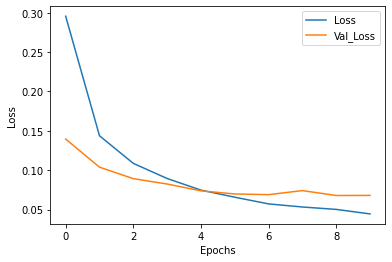

In [ ]:
#Plot loss and val_loss
plt.plot(Model.history['loss'],label='Loss')
plt.plot(Model.history['val_loss'],label='Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

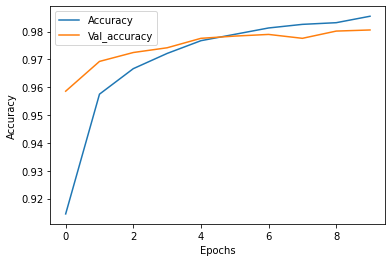

In [ ]:
#Plot acc and val_acc
plt.plot(Model.history['accuracy'],label='Accuracy')
plt.plot(Model.history['val_accuracy'],label='Val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
#Prediction
y_pred = model.predict(x_test).argmax(axis=1)

In [ ]:
#Metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
print(cm)

[[ 973    0    2    1    0    1    1    1    1    0]
 [   0 1125    2    1    0    1    2    0    4    0]
 [   6    0 1009    1    4    0    2    6    4    0]
 [   0    0    3  986    0   11    0    3    2    5]
 [   0    0    0    1  962    0    6    4    2    7]
 [   2    0    0    1    1  875    3    2    6    2]
 [   7    2    0    1    4    3  938    1    2    0]
 [   2    6    9    4    0    0    0 1000    3    4]
 [   1    0    3    3    3    3    2    2  954    3]
 [   1    5    0    1   10    2    0    5    1  984]]


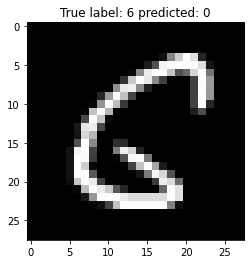

In [ ]:
# Lets see misclassification sample
import numpy as np
mis_idx = np.where(y_pred != ytest)[0]
i = np.random.choice(mis_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: {} predicted: {}".format(ytest[i],y_pred[i]));